In [1]:
import pandas as pd
import requests
import json
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from highlight_text import fig_text, ax_text
from matplotlib.patches import FancyArrowPatch
import kagglehub
import numpy as np
from PIL import Image
import urllib.request
from pyfonts import load_font
import time
from bs4 import BeautifulSoup

In [2]:
n = 4
frames = []
while n <= 38:
    url = f'https://raw.githubusercontent.com/henriquepgomide/caRtola/refs/heads/master/data/01_raw/2024/rodada-{n}.csv'
    df = pd.read_csv(url,index_col=0)
    frames.append(df)
    n += 1
result = pd.concat(frames)
result.head()

,atletas.entrou_em_campo,atletas.foto,atletas.minimo_para_valorizar,atletas.atleta_id,atletas.preco_num,atletas.slug,atletas.jogos_num,atletas.apelido,atletas.clube_id,atletas.rodada_id,...,G,FD,FT,PS,PP,PC,V,CV,DP,GC
0,True,https://s.sde.globo.com/media/person_role/2024...,NaN,37457,4.31,leo-conde,3,Léo Condé,287,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,True,https://s.sde.globo.com/media/person_role/2024...,NaN,37656,10.01,fabio,3,Fábio,266,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,https://s.sde.globo.com/media/person_role/2024...,NaN,38144,7.00,rafinha,0,Rafinha,276,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,https://s.sde.globo.com/media/person_role/2024...,NaN,38394,6.53,thiago-heleno,3,Thiago Heleno,293,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,True,https://s.sde.globo.com/media/person_role/2024...,NaN,38398,6.00,renato-augusto,1,Renato Augusto,266,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_rodadas = pd.read_excel('Data_brasileirao_2024.xlsx')
df_rodadas.head()

,time_casa,placar,time_fora,rodada
0,Grêmio,0 - 3,Corinthians,38
1,Atlético Mineiro,1 - 0,Atlético PR,38
2,Bahia,2 - 0,Atlético GO,38
3,Flamengo,2 - 2,Vitória,38
4,Botafogo,2 - 1,São Paulo,38


In [18]:
filtrado = result[result['atletas.nome'] == 'Bruno Henrique Pinto']
filtrado = filtrado[filtrado['atletas.entrou_em_campo'] == True].reset_index(drop=True)
filtrado = filtrado.drop(columns=[
'atletas.minimo_para_valorizar',
'atletas.clube_id',
'atletas.slug',
'atletas.atleta_id',
'atletas.status_id',
'atletas.posicao_id',
'atletas.apelido_abreviado',
'atletas.nome',
'SG',
'DE',
'GS',
'DP',
'atletas.entrou_em_campo'
])
filtrado.rename(columns={'atletas.rodada_id':'rodada'},inplace=True)
pd.set_option('display.max_columns', None)
df_rodadas_fla = df_rodadas[(df_rodadas['time_casa'] == 'Flamengo') | (df_rodadas['time_fora'] == 'Flamengo')].reset_index(drop=True)
df_merge = pd.merge(filtrado,df_rodadas_fla,how='left',on=['rodada'])
df_merge['pct_pontos'] = df_merge['atletas.pontos_num'].rank(pct=True)
df_merge

,atletas.foto,atletas.preco_num,atletas.jogos_num,atletas.apelido,rodada,atletas.variacao_num,atletas.pontos_num,atletas.clube.id.full.name,atletas.media_num,CA,DS,FC,FF,FS,A,I,G,FD,FT,PS,PP,PC,V,CV,GC,time_casa,placar,time_fora,pct_pontos
0,https://s.sde.globo.com/media/person_role/2024...,7.42,4,Bruno Henrique,4,-0.27,3.8,Flamengo,3.00,1.0,5.0,6.0,1.0,12.0,NaN,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Flamengo,0 - 2,Botafogo,0.458333
1,https://s.sde.globo.com/media/person_role/2024...,8.96,5,Bruno Henrique,5,1.54,11.8,Flamengo,4.76,1.0,6.0,8.0,2.0,12.0,NaN,2.0,1.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bragantino,1 - 1,Flamengo,0.958333
2,https://s.sde.globo.com/media/person_role/2024...,9.57,6,Bruno Henrique,7,0.61,10.1,Flamengo,5.65,1.0,7.0,9.0,2.0,12.0,NaN,2.0,2.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Vasco da Gama,1 - 6,Flamengo,0.833333
3,https://s.sde.globo.com/media/person_role/2024...,8.71,7,Bruno Henrique,8,-0.86,3.5,Flamengo,5.34,1.0,8.0,10.0,4.0,14.0,NaN,2.0,2.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Flamengo,2 - 1,Grêmio,0.416667
4,https://s.sde.globo.com/media/person_role/2024...,8.11,8,Bruno Henrique,9,-0.60,1.0,Flamengo,4.80,1.0,8.0,11.0,5.0,15.0,NaN,2.0,2.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Atlético PR,1 - 1,Flamengo,0.125000
5,https://s.sde.globo.com/media/person_role/2024...,8.20,9,Bruno Henrique,10,0.09,2.5,Flamengo,4.54,1.0,9.0,11.0,6.0,16.0,NaN,2.0,2.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Flamengo,2 - 1,Bahia,0.333333
6,https://s.sde.globo.com/media/person_role/2024...,8.96,10,Bruno Henrique,11,0.76,7.9,Flamengo,4.88,1.0,13.0,13.0,6.0,19.0,NaN,2.0,2.0,5.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,Fluminense,0 - 1,Flamengo,0.791667
7,https://s.sde.globo.com/media/person_role/2024...,8.60,11,Bruno Henrique,13,-0.36,4.6,Flamengo,4.85,1.0,16.0,14.0,7.0,20.0,NaN,2.0,2.0,5.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,Flamengo,2 - 1,Cruzeiro,0.625000
8,https://s.sde.globo.com/media/person_role/2024...,10.97,12,Bruno Henrique,14,2.37,18.9,Flamengo,6.02,2.0,18.0,17.0,7.0,25.0,NaN,3.0,4.0,5.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,Atlético Mineiro,2 - 4,Flamengo,1.000000
9,https://s.sde.globo.com/media/person_role/2024...,8.92,13,Bruno Henrique,15,-2.05,2.9,Flamengo,5.78,2.0,19.0,17.0,7.0,26.0,NaN,3.0,4.0,6.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,Flamengo,1 - 1,Cuiabá,0.375000


C:\Users\bmendes\AppData\Local\Temp\ipykernel_32324\2080128155.py:175: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


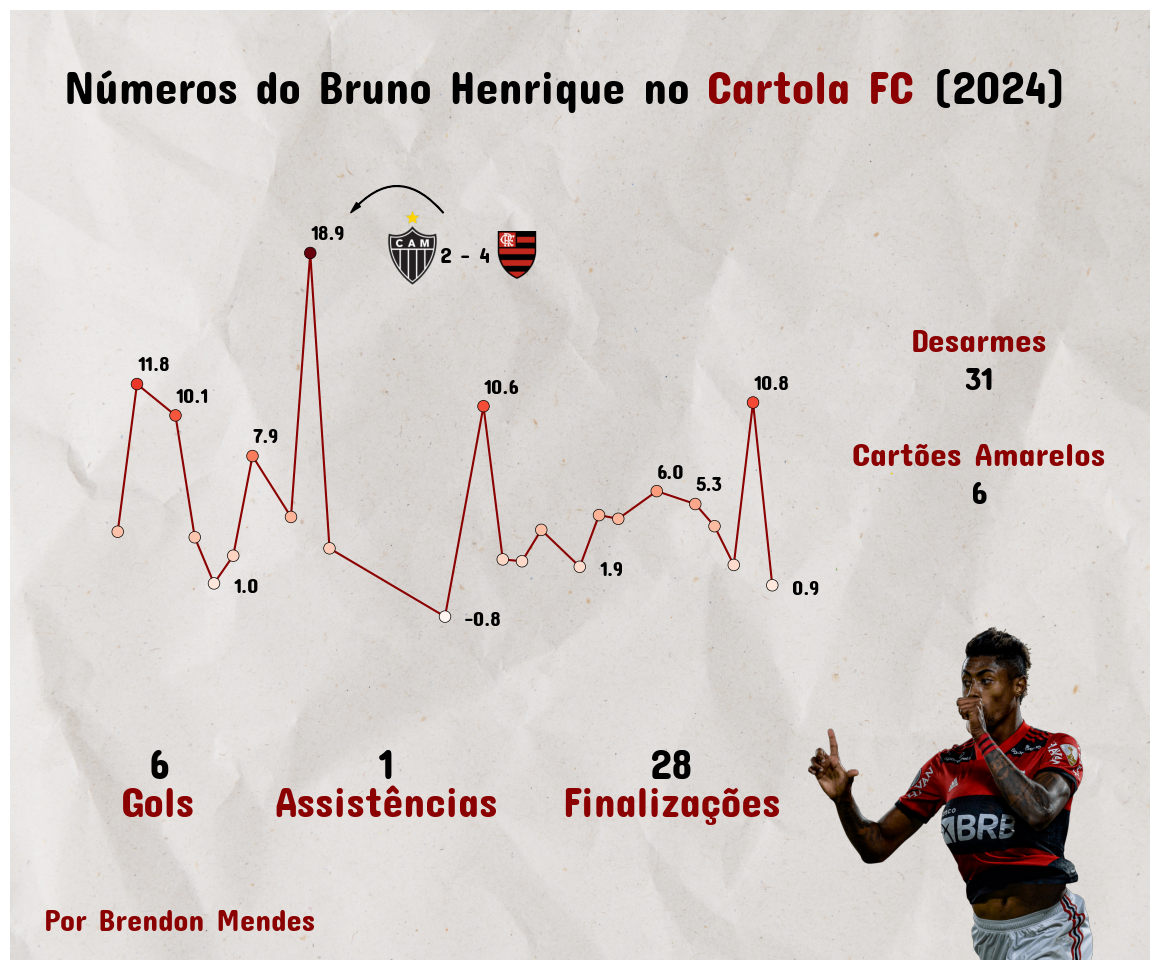

In [19]:
#font
font = load_font(
    font_url='https://github.com/google/fonts/blob/622203b1a1c8bc6958408630ddef38829ea690c3/ofl/bebasneue/BebasNeue-Regular.ttf?raw=true'
)

font_titulo = load_font(
    font_url='https://github.com/google/fonts/blob/622203b1a1c8bc6958408630ddef38829ea690c3/ofl/concertone/ConcertOne-Regular.ttf?raw=true'
)

# img de fundo
img = plt.imread('white-crumpled-paper-background-simple-diy-craft.jpg')
fig, ax = plt.subplots(1,1,figsize=(12,10))
ax.imshow(img, extent=[0,12,0,10])
ax.set_axis_off()
# ax.margins(x=None,y=None)

#inside axe
sub_ax = ax.inset_axes(bounds=(.1,.35,.6,.4),transform=fig.transFigure)
sub_ax.set_axis_off()

sns.lineplot(
    data=filtrado,
    x='rodada',
    y='atletas.pontos_num',
    color='darkred',
    ax=sub_ax,
    zorder = 6
)

#add scatter
cmap = matplotlib.colormaps['Reds']
sub_ax.scatter(
    x=filtrado['rodada'],
    y=filtrado['atletas.pontos_num'],
    cmap=cmap,
    c=filtrado['atletas.pontos_num'],
    s=70,
    edgecolor='black',
    linewidth=0.5,
    zorder=10
)

#destacar rodadas
for index, row in df_merge.iterrows():
    if row['pct_pontos'] > .70:
        sub_ax.text(
            row['rodada'], row['atletas.pontos_num']+0.7, row['atletas.pontos_num'], fontsize=15, color='black', font=font_titulo
        )

    if row['pct_pontos'] < .20:
        sub_ax.text(
            row['rodada']+1, row['atletas.pontos_num']-0.5, row['atletas.pontos_num'], fontsize=15, color='black', font=font_titulo
        )
        
#flecha
def draw_arrow(tail_position,head_position, invert=False):
    kw = dict(
        arrowstyle='Simple, tail_width=0.5, head_width=4, head_length=8', color='k')
    
    if invert:
        connectionstyle = "arc3, rad = -.6"
    else:
        connectionstyle = 'arc3, rad = .6'
    
    a= FancyArrowPatch(tail_position, head_position,connectionstyle=connectionstyle, transform=fig.transFigure, **kw)
    
    fig.patches.append(a)

draw_arrow((.4,.77),(.32,.77))

#imagem dos escudos
path_fla = 'image_fla.png'
path_atle = 'image_atle.png'

image_fla = plt.imread(path_fla)
ax_image_fla = fig.add_axes([0.44,0.69,0.04,0.08])
ax_image_fla.imshow(image_fla)
ax_image_fla.set_axis_off()

image_atle = plt.imread(path_atle)
ax_image_atle = fig.add_axes([0.34,0.7,0.065,0.075])
ax_image_atle.imshow(image_atle)
ax_image_atle.set_axis_off()

# placar
ax_x = fig.add_axes([0.37,0.67,0.065,0.075])
ax_x.set_axis_off()
filtrado_jogo = df_merge[df_merge['pct_pontos'] == 1]
placar = filtrado_jogo['placar'].values

ax_x.text(
    0.4, 0.7, placar[0], fontsize=16, color='black', font=font_titulo
)

#titulo
text = f"""
Números do Bruno Henrique no <Cartola FC> (2024)
"""

fig_text(
    .5,.92,
    text,
    color='black',
    fontweight='bold',
    fontsize=33,
    highlight_textprops=[
        {'color' : 'darkred'},
        # {'fontsize' : 13,
        #  'color' : '#6b6b6b',
        #  'fontweight': 'normal'}
    ],
    ha='center',
    font=font_titulo
)

#estatisticas 1
atleta_ax = ax.inset_axes(bounds=(.7,.4,.25,.4))
df_merge_max = df_merge[df_merge['rodada'] == df_merge['rodada'].max()]

atleta_ax.text(
    0.6,0.5, int(df_merge_max['DS'].values[0]),fontsize=24, color='black',font=font_titulo, ha='center'
)

atleta_ax.text(
    0.6,0.6, 'Desarmes', fontsize=24, color='darkred',font=font_titulo, ha='center'
)

atleta_ax.text(
    0.6,0.2, int(df_merge_max['CA'].values[0]),fontsize=24, color='black',font=font_titulo, ha='center'
)

atleta_ax.text(
    0.6,0.3, 'Cartões Amarelos', fontsize=24, color='darkred',font=font_titulo, ha='center'
)
atleta_ax.set_axis_off()

#estatisticas 2
atleta_ax_ = ax.inset_axes(bounds=(.08,.05,.5,.2))

atleta_ax_.text(
    0.1,0.7, int(df_merge_max['G'].values[0]),fontsize=30, color='black',font=font_titulo, ha='center'
)

atleta_ax_.text(
    0.1,0.5, 'Gols', fontsize=30, color='darkred',font=font_titulo, ha='center'
)

atleta_ax_.text(
    0.5,0.7, int(df_merge_max['A'].values[0]),fontsize=30, color='black',font=font_titulo, ha='center'
)

atleta_ax_.text(
    0.5,0.5, 'Assistências', fontsize=30, color='darkred',font=font_titulo, ha='center'
)

atleta_ax_.text(
    1,0.7, int(df_merge_max['FT'].values[0] + df_merge_max['FD'].values[0] + df_merge_max['FF'].values[0]),fontsize=30, color='black',font=font_titulo, ha='center'
)

atleta_ax_.text(
    1,0.5, 'Finalizações', fontsize=30, color='darkred',font=font_titulo, ha='center'
)

atleta_ax_.text(
    -0.1,-0.1, 'Por Brendon Mendes', fontsize=22, color='darkred',font=font_titulo, ha='left'
)
atleta_ax_.set_axis_off()

#foto atleta
image_bh = plt.imread("Bruno Henrique - FootyRenders.png")
atleta_ax = ax.inset_axes(bounds=(.7,-0.023,.25,.4))
atleta_ax.imshow(image_bh)
atleta_ax.set_axis_off()

plt.tight_layout()
plt.savefig('./BHCartolaFc', pad_inches = 0)
plt.show()